# Линейная регрессия

# Ссылка на скачивание датасета: [датасет](https://drive.google.com/file/d/1IxN3dR1D6W_hUI656ghr2T3HcolgLsMF/view?usp=share_link)

## Импорт библиотек и загрузка данных

Импортируем нужные библиотеки:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузим датасет:

In [17]:
data = pd.read_csv('penguins.csv')
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Датасет содержит 7 признаков:

- **вид**: вид пингвина. Всего их три разных:
  - 0: Adelie
  - 1: Chinstrap
  - 2: Gento
- **остров**: oстров, на котором обитает пингвин. Всего их три разных:
  - 0: Biscoe  
  - 1: Dream
  - 2: Torgersen
- **длина клюва**: длина клюва пингвина в миллиметрах;
- **ширина клюва**: ширина клюва пингвина в миллиметрах;
- **длина плавника**: длина плавника пингвина в миллиметрах;
- **масса тела**:	масса тела пингвина в граммах;
- **пол**: пол пингвина. Всго их два:
  - 0: самка
  - 1: самец





## Предобработка данных

### Задача 0.1. Вызовите метод, описывающий численные признаки датасета:


In [18]:
data.describe()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.918919,0.651652,43.992793,17.164865,200.966967,4207.057057,0.504505
std,0.889718,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,2.000000,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


### Задача 0.2. Постройте стоблчатые диаграммы распределения признаков датасета:

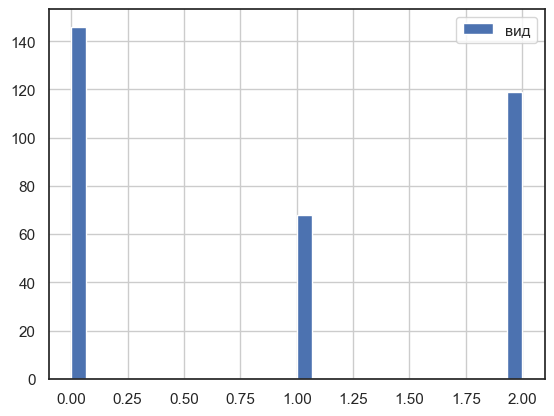

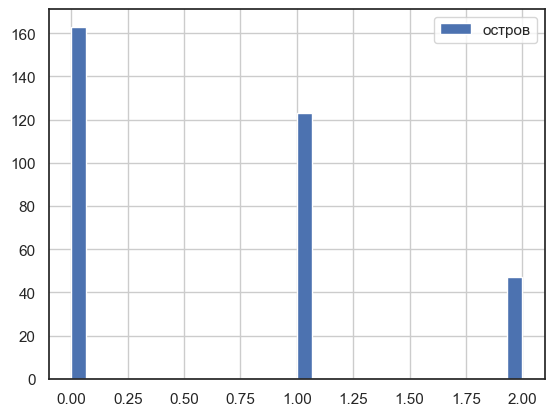

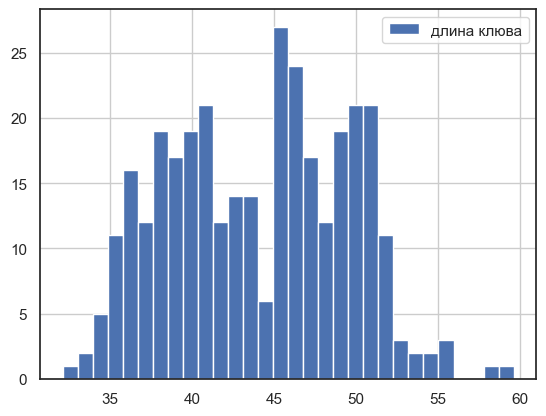

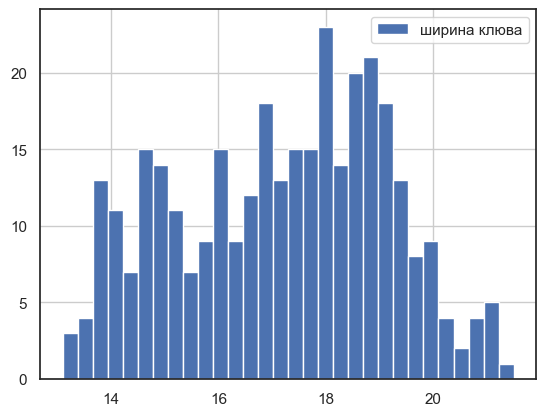

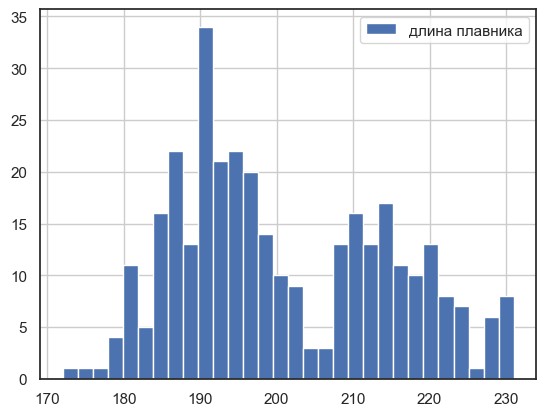

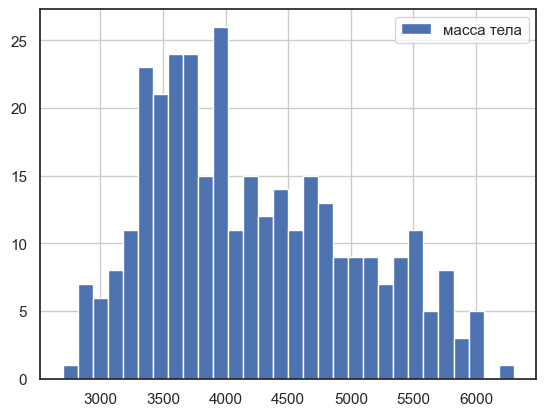

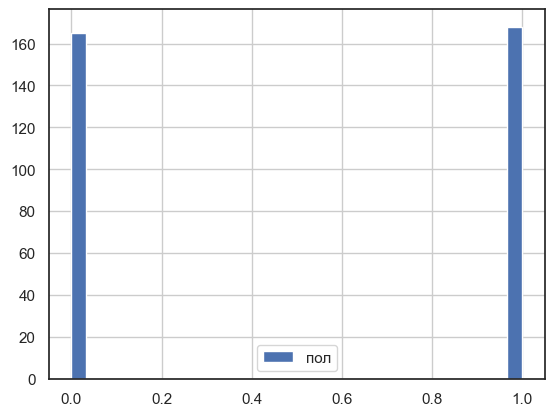

In [19]:
for name in data.columns.values.tolist():
    data[name].hist(bins=30, label=name)
    plt.legend()
    plt.show()

### Задача 1. Воспользуйтесь методом one-hot-encoding для полей остров и вид. ЗАГУГЛИТЬ!

In [20]:
data = pd.get_dummies(data, columns=["остров", "вид"])

In [21]:
data

,длина клюва,ширина клюва,длина плавника,масса тела,пол,остров_0,остров_1,остров_2,вид_0,вид_1,вид_2
0,39.1,18.7,181.0,3750.0,1,False,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,0,False,False,True,True,False,False
2,40.3,18.0,195.0,3250.0,0,False,False,True,True,False,False
3,36.7,19.3,193.0,3450.0,0,False,False,True,True,False,False
4,39.3,20.6,190.0,3650.0,1,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,0,True,False,False,False,False,True
329,46.8,14.3,215.0,4850.0,0,True,False,False,False,False,True
330,50.4,15.7,222.0,5750.0,1,True,False,False,False,False,True
331,45.2,14.8,212.0,5200.0,0,True,False,False,False,False,True


### Задача 2. Стандартизуйте поля длина клюва, ширина клюва, длина плавника, масса тела (объект - min поделить на разницу max-min)

In [22]:
def standartize(col):
    col = (col - col.min()) / (col.max() - col.min())
    return col

data["длина клюва"] = standartize(data["длина клюва"])
data["ширина клюва"] = standartize(data["ширина клюва"])
data["длина плавника"] = standartize(data["длина плавника"])
data["масса тела"] = standartize(data["масса тела"])

### Задача 3. Отобразите heatmap для данных

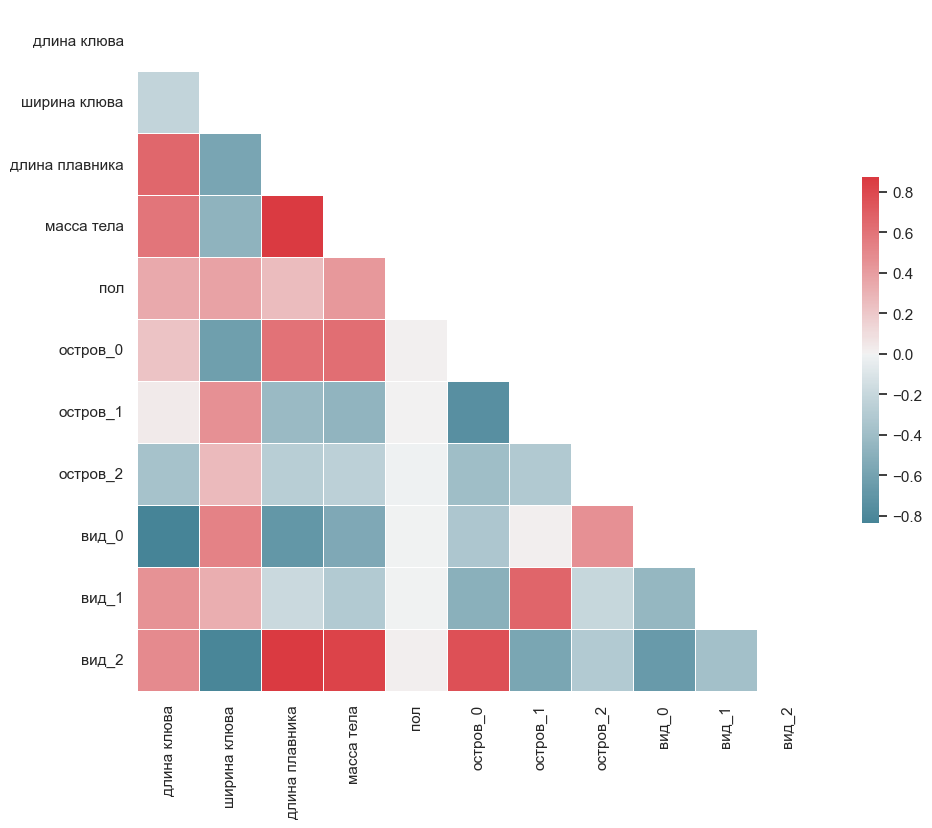

In [23]:
import seaborn as sns

sns.set(style="white")
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 11, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Задача 4. Отобразите scatter plot зависимости переменной длина плавника от переменной длина клюва

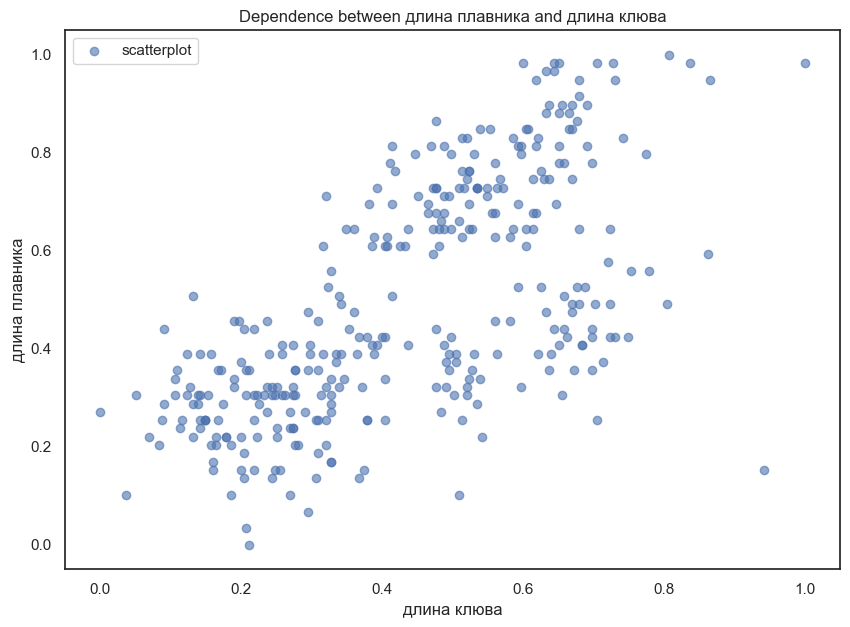

In [24]:
plt.figure(figsize = (10,7))
plt.scatter(data["длина клюва"], data["длина плавника"], alpha=0.6, label='scatterplot')
plt.xlabel('длина клюва')
plt.ylabel('длина плавника')
plt.title('Dependence between длина плавника and длина клюва')
plt.legend()
plt.show()

### Задача 5. Отобразите scatter plot зависимости переменной длина плавника от переменной ширина клюва

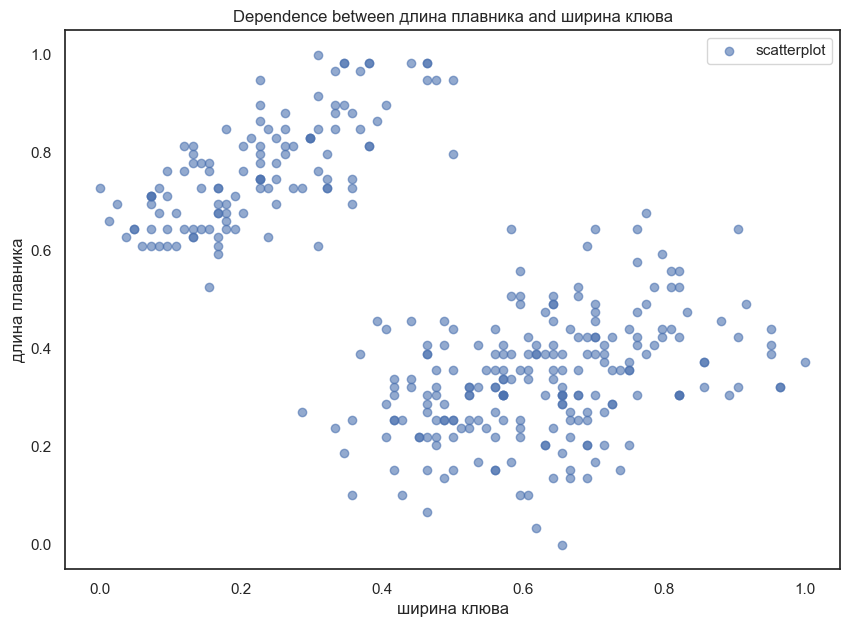

In [25]:
plt.figure(figsize = (10,7))
plt.scatter(data["ширина клюва"], data["длина плавника"], alpha=0.6, label='scatterplot')
plt.xlabel('ширина клюва')
plt.ylabel('длина плавника')
plt.title('Dependence between длина плавника and ширина клюва')
plt.legend()
plt.show()

### Задача 6. Отобразите pair plot для данных

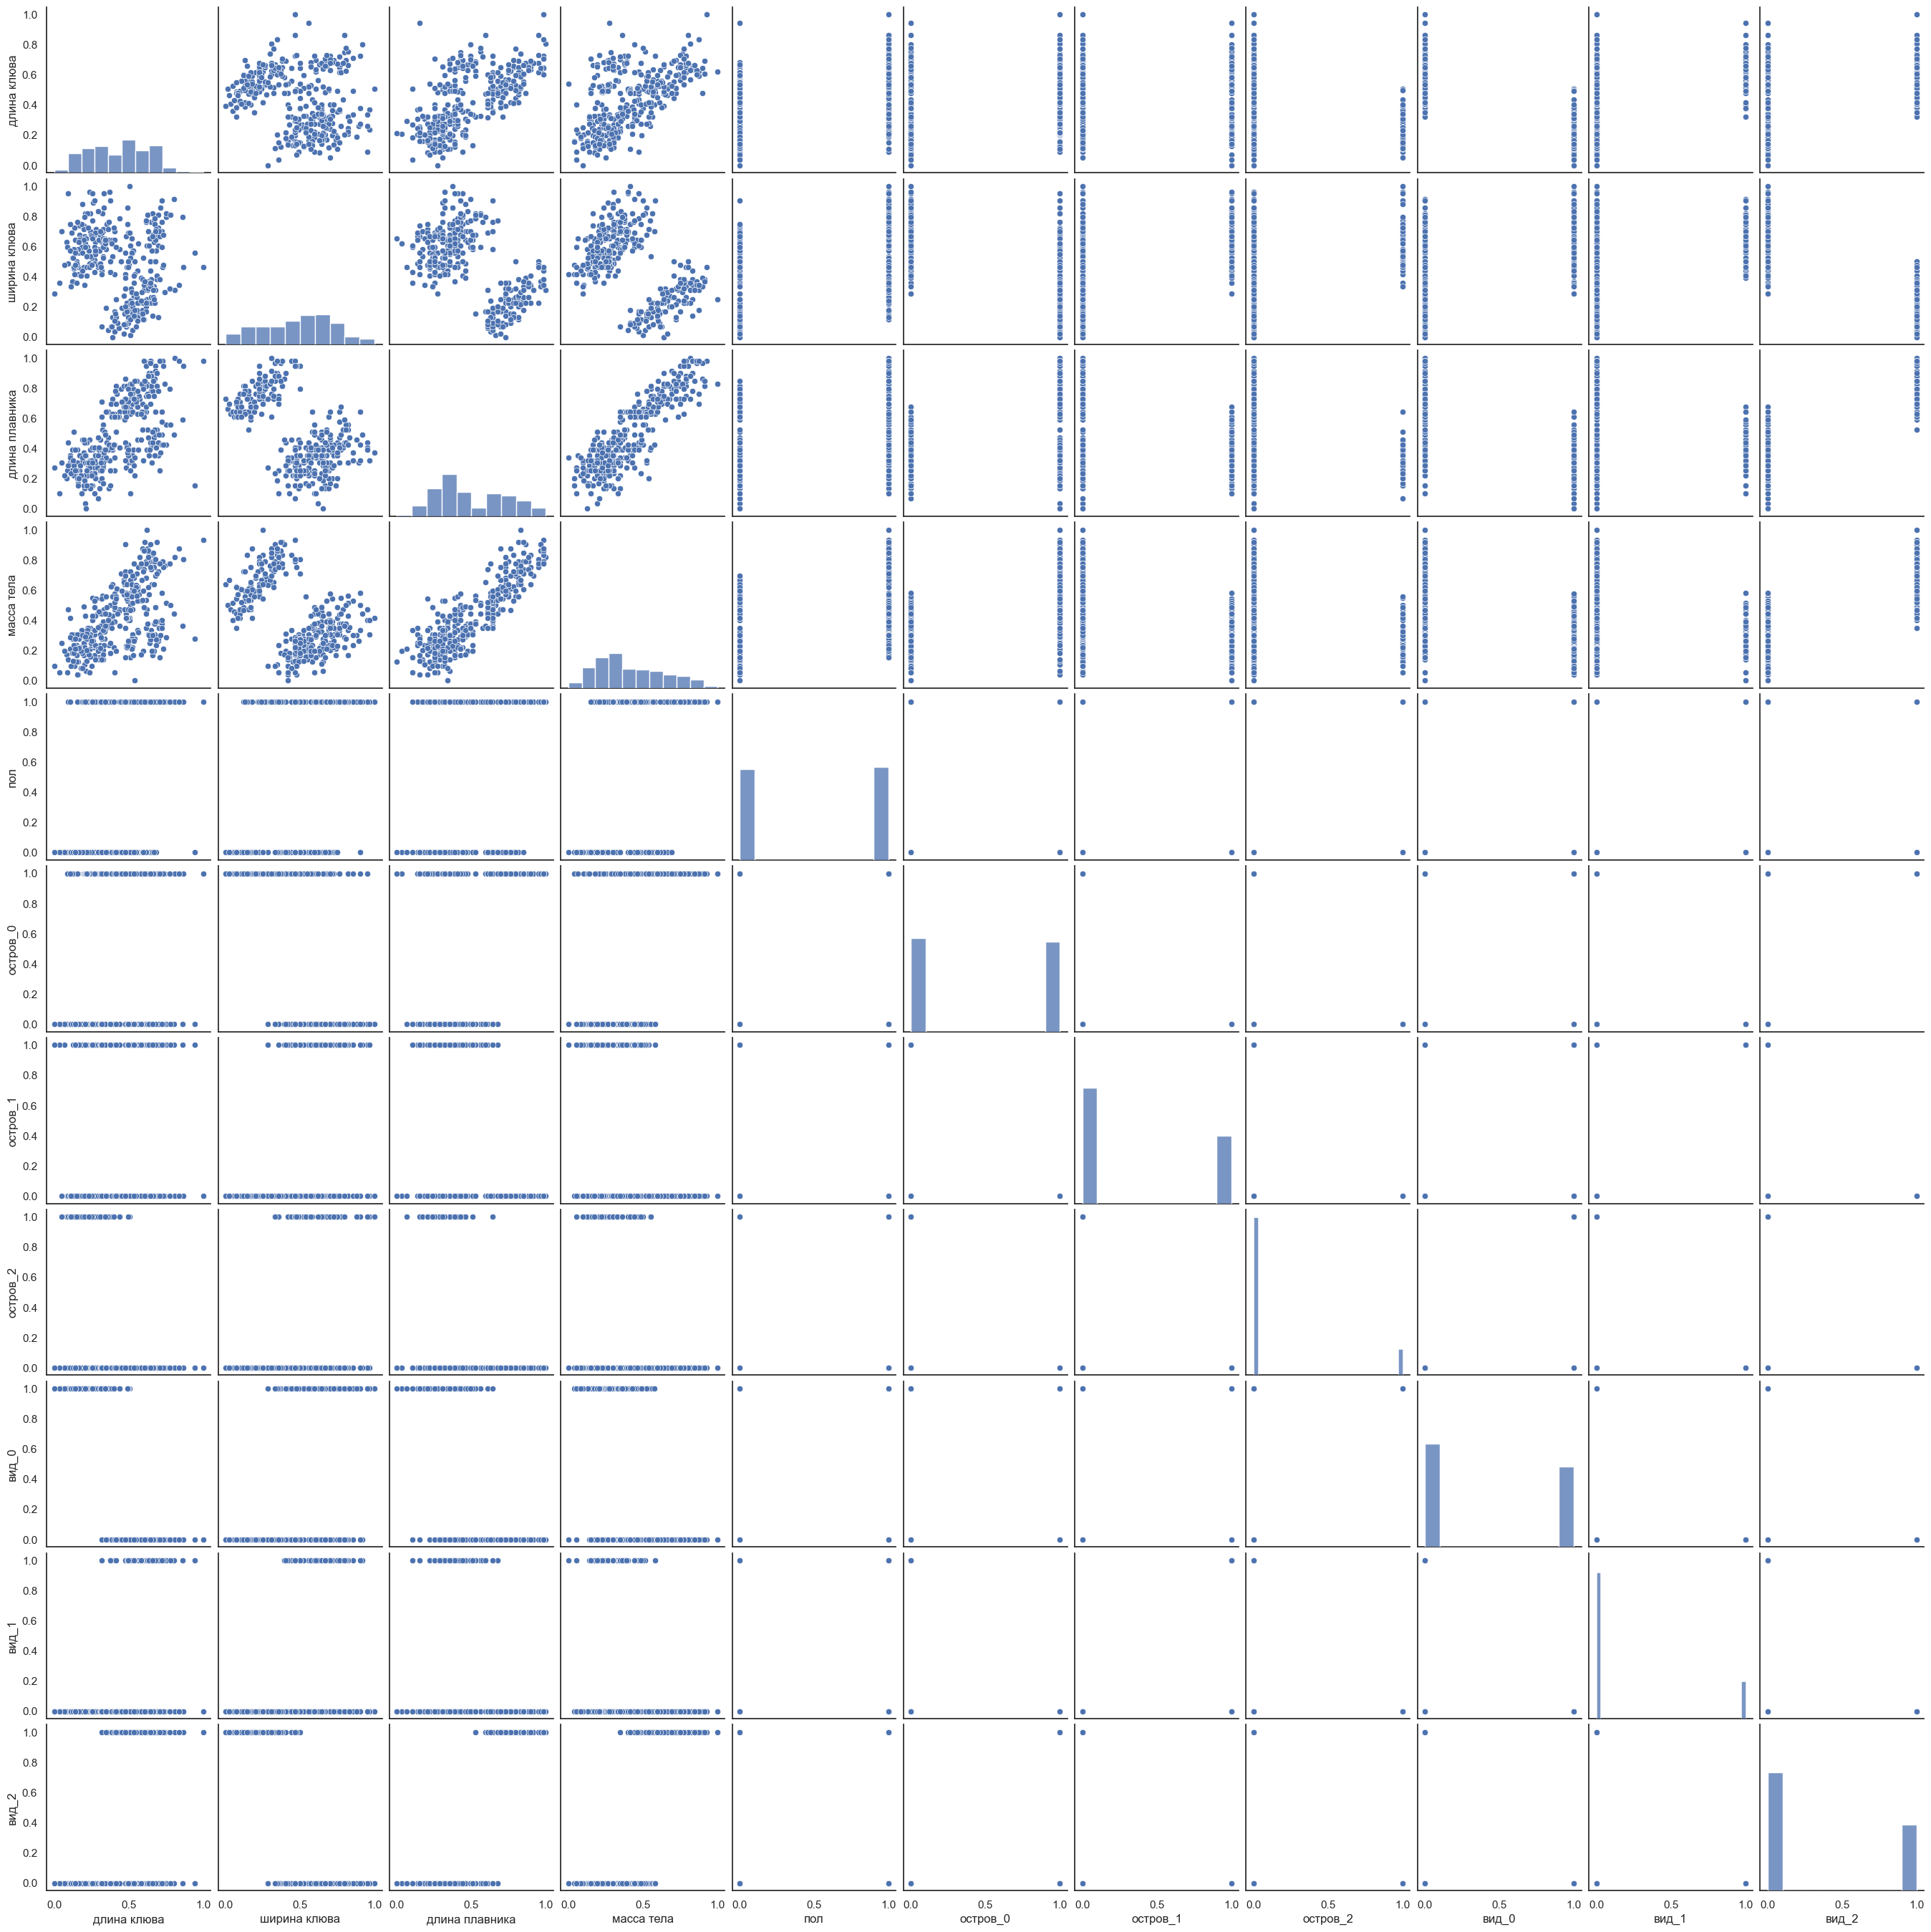

In [26]:
sns.pairplot(data, kind='scatter')
plt.show()

### Задача 7. Отобразите круговую диаграмму, показывающую отношение объектов по признаку "остров"

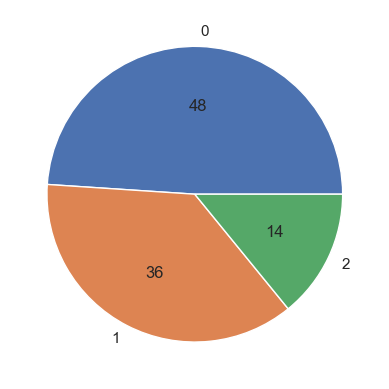

In [27]:
plt.pie([data["остров_0"].sum(), data["остров_1"].sum(), data["остров_2"].sum()], labels=[0,1,2], autopct='%d')
plt.show()

### Задача 8. Реализуйте функцию сигмоиды

In [28]:
import math

def sigmoida(x):
    y = 1 / (1 + math.exp(x))
    return y

assert sigmoida(0) == 0.5

И теперь реализуем свой класс линейной регрессии, который затем обучим на датасете:

## Для любознательных. Реализация класса линейной регрессии

Ниже — заготовка класса линейной регрессии. Ваша задача — написать код для его методов.

Код нужно проверить его на правильность, попробовав обучить свою линейную регрессию на данных пингвинов, которые мы только что загрузили. Код для этого реализован ниже.

Несколько комментариев к заданию:
- для каждого метода класса (fit, predict) описано, что этот метод принимает на вход и какой функционал реализует. По сути, fit — это аналог метода fit модели линейной регресси из sklearn, predict — аналог метода predict модели линейной регресси из sklearn;
- в методе fit при полечении коэффициентов линейной регрессии вам нужно получить две переменные: self.coef_ и self.intercept_. В self.coef_ должен получиться массив коэффициентов, которые модель поставила в соответствие признакам датасета. В self.intercept_ должно получиться одно число — коэффициент-свободный член, который выучила модель. По сути, self.coef_ и self.intercept_ должны быть аналогами этих же переменных модели Linear Regression из sklearn.

Алгоритм реализации метода fit:
1. Перевести X и y в numpy array (для удобства). Это уже реализовано;
2. Добавить к Х первый столбец из единиц. Подсказка: чтобы это сделать, удобно использовать np.hstack. Подумайте, как именно;
3. Получить массив коэффициентов k по формуле, которую мы рассматривали в теоретическом видео (2 видео, 16 слайд)
4. Разбить полученный массив коэффициентов k на self.coef_ и self.intercept_

Алгоритм реализации метода predict:
1. Получить значения y_pred, используя значения выученных коэффициентов и входящих признаков Х по формуле, которую мы рассматривали в теоретическом видео (2 видео, 16 слайд)

# После стандартизации матрица вырождается, поэтому стандартный алгоритм ломается. В таком случае использую градиентный спуск. Мы будем использовать нестандартизированные данные:

In [29]:
data = pd.read_csv('penguins.csv')

In [30]:
class MyLinearRegression:
    def __init__(self):

        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        X = np.hstack(
            ( np.ones( (len(X),1), int ), X )
        )
        k = np.linalg.inv(X.T @ X) @ X.T @ y

        self.coef_ = k[1:]
        self.intercept_ = k[0]

    def predict(self, X):

        y_pred = X @ self.coef_ + self.intercept_

        return y_pred

## Тестирование класса линейной регрессии

Давайте протестируем наш самописный класс MyLinearRegression, чтобы убедиться, что мы написали его верно.

### Датасет с одним признаком

Сначала протестируем случай, когда у нас всего один признак в данных. Заведем переменные Х и y, и присвоим Х один из столбцов нашего датасета пингвинов. В этот раз давайте будем пытаться предсказывать длину клюва пингвина по его длине плавника.

In [31]:
X = data[['длина плавника']]
y = data['длина клюва']

Разобьем Х и y на train и test:

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

И визуализируем точки обучающей выборки:

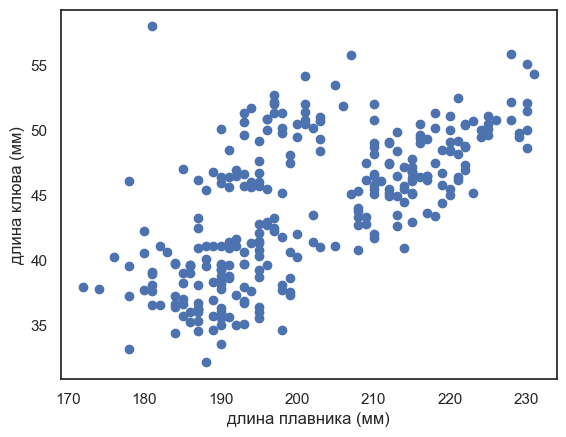

In [33]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('длина плавника (мм)');
plt.ylabel('длина клюва (мм)');

plt.show()

Отлично. Теперь объявим и обучим нашу линейную регрессию:

In [34]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)

И посмотрим, какие у нашей линейной регрессии получились коэффициенты:

In [35]:
my_lr.coef_, my_lr.intercept_

(array([0.25125229]), np.float64(-6.490068177881099))

Теперь мы можем визуализировать прямую, которую описывает наша линейная регрессия. Убедитесь, что ваша линейная регрессия строит прямую, которая адекватно описывает точки (т.е. похожа на правильную).

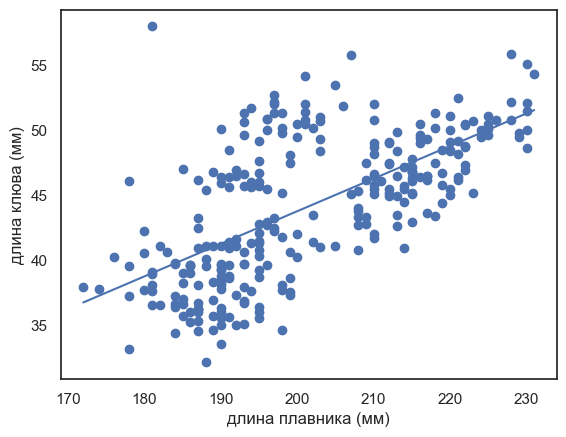

In [36]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# визуализируем прямую, которую выражает линейная регрессия
# y = coef_*x_1 + intercept_
def f_line(x):
    return  my_lr.coef_*x + my_lr.intercept_

x = [np.min(X_train), np.max(X_train)]
y = f_line(x)
plt.plot(x, y)

plt.xlabel('длина плавника (мм)')
plt.ylabel('длина клюва (мм)')

plt.show()

Хорошо, мы убедились, что наша линейная регрессия как-то работает: выучивает какие-то коэффициенты. Давайте теперь убедимся, что она работает **правильно**. Для этого импортируем линейную регрессию из sklearn, обучим ее на тех же данных и получим ее коэффициенты. Они должны совпадать с теми, что выучивает наша самописная линейная регрессия.

In [37]:
from sklearn.linear_model import LinearRegression

Объявляем модель, обучаем и получаем коэффициенты:

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([0.25125229]), np.float64(-6.490068177881838))

Еще раз выведем коэффициенты нашей самописной модели, чтобы сравнить их с теми, что выдает модель из sklearn:

In [39]:
my_lr.coef_, my_lr.intercept_

(array([0.25125229]), np.float64(-6.490068177881099))

Можно убедиться на глаз, что коэффициенты вашей модели такие же, что у модели из sklearn. Но можно проверить с помощью кода. Код ниже проверяет, что coef_ и inpercept_ вашей модели близки к coef_ и inpercept_ модели из sklearn. Если код ниже не выдает ошибку, то все хорошо. Если выдает ошибку, то ваша модель работает неправильно.

In [40]:
assert np.allclose(my_lr.coef_, lr.coef_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"

Если ошибок нет, то поздравляю: у вашей линейной регрессии правильно работает метод fit на датасете, в котором один признак =). Проверим теперь работу метода predict. Вызовем predict у my_lr и у lr и сравним ответы:

In [41]:
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Ошибка: метод predict выдает неверные результаты!"

Если ячейка отработала без ошибок, поздравляю: ваша линейная регрессия полностью правильно работает на датасете, в котором один признак!
    
Теперь давайте проверим, что самописная модель также работает на данных, в которых несколько признаков:

### Датасет с несколькими признаками

In [42]:
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Давайте обучим нашу модель на данных, в которых будут все 6 признаков (все, кроме "длина клюва", которая у нас целевая переменная).

In [43]:
y = data['длина клюва']
X = data.drop(columns=['длина клюва'])

Поделим данные на train и test:

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Объявим и обучим самописную линейную регрессию на train части:

In [45]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)
my_lr.coef_, my_lr.intercept_

(array([ 8.23150429e+00,  6.60514309e-01,  1.46747749e+00, -1.12189003e-02,
        -1.29695364e-03,  2.45712511e+00]),
 np.float64(17.26428109784403))

Также объявим и обучим модель из sklearn, чтобы сравнить их:

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([ 8.23150429e+00,  6.60514309e-01,  1.46747749e+00, -1.12189003e-02,
        -1.29695364e-03,  2.45712511e+00]),
 np.float64(17.264281097866828))

Проверка, что coef_ и intercept_ совпадают:

In [47]:
assert np.allclose(my_lr.coef_, lr.coef_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"

И также проверим, что правильно работает метод predict:

In [48]:
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Ошибка: метод predict выдает неверные результаты!"

Итак, если все ячейки до этого момента отработали без ошибок, поздравляю: кажется, ваша линейная регрессия полностью правильно работает и на датасете, в котором несколько признаков!

Вы можете тестировать вашу модель и далее, обучая ее на других датасетах.